# Showwcase Internship Data Report Exercise

In [190]:
import sidetable
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy

In [191]:
data = pd.read_csv("showwcase_sessions.csv")
data.head()

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205.0,80746.0,10/30/19,False,True,True,True,False,0.0,24.0,3.0,1146.0,0.0,1564.0
1,624241.0,24520.0,10/30/19,True,True,True,True,False,2.0,3.0,5.0,133.0,0.0,1766.0
2,111002.0,32047.0,10/30/19,True,True,True,True,False,1.0,5.0,5.0,1571.0,0.0,2230.0
3,545113.0,23404.0,10/30/19,True,True,True,False,False,1.0,10.0,21.0,0.0,0.0,633.0
4,750269.0,40235.0,10/30/19,True,True,False,True,False,3.0,16.0,0.0,1405.0,0.0,1679.0


In [192]:
data.stb.missing()

,missing,total,percent
session_likes_given,3,302,0.993377
session_id,2,302,0.662252
customer_id,2,302,0.662252
login_date,2,302,0.662252
projects_added,2,302,0.662252
likes_given,2,302,0.662252
comment_given,2,302,0.662252
inactive_status,2,302,0.662252
bug_occured,2,302,0.662252
session_projects_added,2,302,0.662252


In [193]:
data[data['session_likes_given'].isnull()]

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
35,862128.0,23404.0,10/26/19,True,False,True,True,False,2.0,NaN,2.0,1120.0,0.0,95.0
300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [194]:
#Drop empty rows
data.dropna(axis = 'index',
           how = 'all',
            inplace=True
           )

#Fill 'session_likes_given' with 0 because 'likes_given' is FALSE
data.fillna(value = 0, inplace=True)

In [195]:
#Recheck Missingness
data.stb.missing(style = True)

,missing,total,percent
session_id,0,300,0.00%
customer_id,0,300,0.00%
login_date,0,300,0.00%
projects_added,0,300,0.00%
likes_given,0,300,0.00%
comment_given,0,300,0.00%
inactive_status,0,300,0.00%
bug_occured,0,300,0.00%
session_projects_added,0,300,0.00%
session_likes_given,0,300,0.00%


In [203]:
#Some inactive durations are longer than the sessions themselves
data[(data.inactive_duration > data.session_duration)]

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
5,744943.0,73245.0,10/30/19,True,True,True,True,True,3.0,27.0,5.0,1746.0,4.0,1490.0
7,823895.0,29375.0,10/30/19,False,False,True,True,False,0.0,0.0,5.0,2474.0,0.0,1875.0
9,919319.0,23404.0,10/29/19,True,True,False,True,False,2.0,14.0,0.0,2031.0,0.0,1957.0
11,362558.0,40572.0,10/29/19,True,True,True,True,False,3.0,19.0,3.0,2148.0,0.0,187.0
14,730021.0,23083.0,10/29/19,True,True,True,True,False,1.0,3.0,2.0,2047.0,0.0,1736.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,401728.0,12940.0,10/4/19,False,True,True,True,False,0.0,11.0,1.0,1543.0,0.0,557.0
276,682794.0,23404.0,10/3/19,True,True,True,True,True,2.0,11.0,4.0,2343.0,5.0,1956.0
277,557880.0,40235.0,10/3/19,True,True,True,True,False,3.0,1.0,1.0,2428.0,0.0,1114.0
290,187302.0,12407.0,10/2/19,True,False,False,True,False,3.0,0.0,0.0,1749.0,0.0,464.0


In [206]:
#Swap those columns
data.inactive_duration, data.session_duration = np.where(data.inactive_duration > data.session_duration,
                                                         [data.session_duration, data.inactive_duration],
                                                         [data.inactive_duration, data.session_duration])


data[(data.inactive_duration > data.session_duration)]

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration


In [215]:
#Create a active sessoin duration column
data['session_active_duration'] = data['session_duration'] - data['inactive_duration']
data.head()

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration,session_active_duration
0,624205.0,80746.0,10/30/19,False,True,True,True,False,0.0,24.0,3.0,1146.0,0.0,1564.0,418.0
1,624241.0,24520.0,10/30/19,True,True,True,True,False,2.0,3.0,5.0,133.0,0.0,1766.0,1633.0
2,111002.0,32047.0,10/30/19,True,True,True,True,False,1.0,5.0,5.0,1571.0,0.0,2230.0,659.0
3,545113.0,23404.0,10/30/19,True,True,True,False,False,1.0,10.0,21.0,0.0,0.0,633.0,633.0
4,750269.0,40235.0,10/30/19,True,True,False,True,False,3.0,16.0,0.0,1405.0,0.0,1679.0,274.0


In [223]:
data.stb.freq(['likes_given','comment_given','projects_added'], style=True)

,likes_given,comment_given,projects_added,count,percent,cumulative_count,cumulative_percent
0,True,True,True,124,41.33%,124,41.33%
1,False,True,True,44,14.67%,168,56.00%
2,True,True,False,40,13.33%,208,69.33%
3,True,False,True,37,12.33%,245,81.67%
4,False,False,True,22,7.33%,267,89.00%
5,False,True,False,17,5.67%,284,94.67%
6,True,False,False,12,4.00%,296,98.67%
7,False,False,False,4,1.33%,300,100.00%


In [227]:
data.stb.freq(['likes_given','comment_given','projects_added']).iloc[4]['percent'] + data.stb.freq(['likes_given','comment_given','projects_added']).iloc[5]['percent'] + data.stb.freq(['likes_given','comment_given','projects_added']).iloc[6]['percent']

17.0

In [229]:
highlights_ = {"Percentage of Sessions" : {
    'Project Creation' : data.stb.freq(['projects_added']).loc[data.stb.freq(['projects_added'])['projects_added'] == True,'percent'].values[0],
    'Comment Left' : data.stb.freq(['comment_given']).loc[data.stb.freq(['comment_given'])['comment_given'] == True, 'percent'].values[0],
    'Likes Given' : data.stb.freq(['likes_given']).loc[data.stb.freq(['likes_given'])['likes_given'] == True, 'percent'].values[0],
    'Likes & Comments' : data.stb.freq(['likes_given','comment_given','projects_added']).iloc[2]['percent'],
    'Projects, Likes & Comments' : data.stb.freq(['likes_given','comment_given','projects_added']).iloc[0]['percent'],
    'Only 1 form of engagement' : data.stb.freq(['likes_given','comment_given','projects_added']).iloc[4]['percent'] + data.stb.freq(['likes_given','comment_given','projects_added']).iloc[5]['percent'] + data.stb.freq(['likes_given','comment_given','projects_added']).iloc[6]['percent'],
    'No Engagement' : data.stb.freq(['likes_given','comment_given','projects_added']).iloc[7]['percent']
}
              }

In [230]:
highlights = pd.DataFrame(
                          data = highlights_
                         )
highlights.sort_values(by = 'Percentage of Sessions',ascending = False, inplace = True)

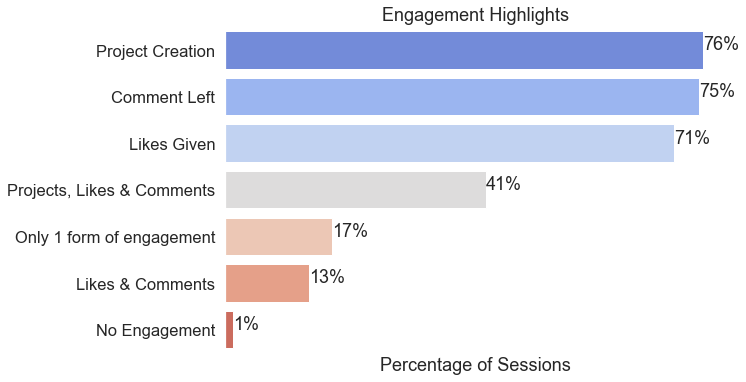

In [231]:
sns.despine()
sns.set(rc={'axes.facecolor':'white',
            'figure.facecolor':'white',
            'figure.figsize':(9,6),
            
           },
       font_scale=1.5)

highlights_chart = sns.barplot(orient = 'h',
            data = highlights,
           x = 'Percentage of Sessions',
            y = highlights.index,
            palette = "coolwarm",
        
           )
highlights_chart.set_title('Engagement Highlights')
highlights_chart.set_xticks(ticks = [])



for i, p in enumerate(highlights_chart.patches):
        percentage = '{:.0f}%'.format(highlights['Percentage of Sessions'][i])
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        highlights_chart.annotate(percentage, (x, y))
        
highlights_chart.figure.savefig('assets/highlights_chart.png');

In [216]:
#Mean Session Duration
(data.session_duration / 60).mean()

23.839111111111112

In [217]:
#Mean Active duration
(data['session_active_duration'] / 60).mean()

15.683277777777775

In [219]:
#Other Means
data.mean()

session_id                 530643.296667
customer_id                 44956.766667
projects_added                  0.756667
likes_given                     0.710000
comment_given                   0.750000
inactive_status                 0.573333
bug_occured                     0.386667
session_projects_added          1.620000
session_likes_given            10.423333
session_comments_given          2.406667
inactive_duration             489.350000
bugs_in_session                 1.233333
session_duration             1430.346667
session_active_duration       940.996667
dtype: float64

In [221]:
#Unique customers
len(data['customer_id'].unique())

48

In [233]:
#Top 10 users account for 55% of all sessions
data.stb.freq(['customer_id']).head(10)

,customer_id,count,percent,cumulative_count,cumulative_percent
0,29375.0,22,7.333333,22,7.333333
1,23404.0,21,7.000000,43,14.333333
2,38459.0,18,6.000000,61,20.333333
3,87323.0,17,5.666667,78,26.000000
4,40235.0,17,5.666667,95,31.666667
5,40572.0,16,5.333333,111,37.000000
6,73245.0,15,5.000000,126,42.000000
7,14354.0,15,5.000000,141,47.000000
8,87265.0,12,4.000000,153,51.000000
9,51243.0,12,4.000000,165,55.000000


In [236]:
#Get data for top customers
top_cust_ids = list(data.stb.freq(['customer_id']).head(10)['customer_id'])
top_cust_data = data.loc[data['customer_id'].isin(top_cust_ids)].groupby(by='customer_id').sum()
top_cust_data['session_active_duration_avg'] = data.loc[data['customer_id'].isin(top_cust_ids)].groupby(by='customer_id').mean()['session_active_duration']
top_cust_data

,session_id,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration,session_active_duration,session_active_duration_avg
customer_id,,,,,,,,,,,,,,
14354.0,9383233.0,14,9,13,7,6,31.0,150.0,38.0,6723.0,15.0,19678.0,12955.0,863.666667
23404.0,11778054.0,16,17,15,10,9,25.0,207.0,64.0,9239.0,33.0,30200.0,20961.0,998.142857
29375.0,11452204.0,13,12,17,13,9,20.0,189.0,44.0,9642.0,26.0,32581.0,22939.0,1042.681818
38459.0,10203012.0,13,13,14,10,4,25.0,187.0,43.0,10818.0,15.0,24616.0,13798.0,766.555556
40235.0,8472913.0,12,12,13,9,5,23.0,119.0,34.0,9326.0,19.0,26722.0,17396.0,1023.294118
40572.0,9992385.0,13,12,13,11,7,27.0,179.0,46.0,8867.0,25.0,24208.0,15341.0,958.812500
51243.0,5337054.0,8,8,8,5,4,24.0,154.0,26.0,5103.0,14.0,14747.0,9644.0,803.666667
73245.0,9596209.0,10,12,12,11,7,24.0,183.0,36.0,8992.0,24.0,24910.0,15918.0,1061.200000
87265.0,5773924.0,11,10,10,5,4,24.0,149.0,33.0,4518.0,12.0,17977.0,13459.0,1121.583333


In [245]:
top_cust_data.describe().drop(columns = ['session_id'])

,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration,session_active_duration,session_active_duration_avg
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,12.600000,11.900000,12.700000,8.900000,6.300000,26.100000,174.700000,40.500000,8035.500000,20.800000,23519.400000,15483.900000,937.066234
std,2.503331,2.558211,2.496664,2.643651,2.002776,5.043147,32.225077,10.200762,2069.987292,6.795423,5565.330662,4030.755387,136.196260
min,8.000000,8.000000,8.000000,5.000000,4.000000,20.000000,119.000000,26.000000,4518.000000,12.000000,14747.000000,9644.000000,731.058824
25%,11.250000,10.500000,12.000000,7.250000,4.250000,24.000000,151.000000,34.500000,6824.000000,15.000000,19585.750000,13081.000000,818.666667
50%,13.000000,12.000000,13.000000,9.500000,6.500000,24.500000,181.000000,39.500000,8929.500000,21.500000,24412.000000,14569.500000,978.477679
75%,13.750000,12.750000,13.750000,10.750000,7.750000,26.500000,188.500000,43.750000,9304.250000,25.000000,26269.000000,17026.500000,1037.834893
max,16.000000,17.000000,17.000000,13.000000,9.000000,38.000000,230.000000,64.000000,10818.000000,33.000000,32581.000000,22939.000000,1121.583333


In [235]:
#Number of users with only 1 session
data.stb.freq(['customer_id'])[data.stb.freq(['customer_id'])['count'] == 1]
print(data.stb.freq(['customer_id'])[data.stb.freq(['customer_id'])['count'] == 1].shape[0])

18


In [243]:
bot_cust_ids = list(data.stb.freq(['customer_id'])[data.stb.freq(['customer_id'])['count'] == 1]['customer_id'])

bot_cust_data = data.loc[data['customer_id'].isin(bot_cust_ids)].groupby(by='customer_id').sum()
bot_cust_data['session_active_duration_avg'] = data[data['customer_id'].isin(bot_cust_ids)].groupby(by='customer_id').mean()['session_active_duration']
bot_cust_data

,session_id,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration,session_active_duration,session_active_duration_avg
customer_id,,,,,,,,,,,,,,
19348.0,378958.0,1,1,1,1,0,1.0,22.0,1.0,1565.0,0.0,2195.0,630.0,630.0
19374.0,827919.0,1,0,1,0,0,1.0,0.0,4.0,0.0,0.0,1633.0,1633.0,1633.0
20548.0,878079.0,1,1,0,1,1,3.0,25.0,0.0,258.0,1.0,1801.0,1543.0,1543.0
23457.0,463600.0,1,1,1,0,0,2.0,7.0,2.0,0.0,0.0,207.0,207.0,207.0
23548.0,437487.0,0,1,0,0,0,0.0,12.0,0.0,0.0,0.0,1327.0,1327.0,1327.0
23596.0,905141.0,1,1,1,1,0,2.0,7.0,5.0,640.0,0.0,2077.0,1437.0,1437.0
29345.0,571482.0,0,1,1,0,0,0.0,27.0,4.0,0.0,0.0,1291.0,1291.0,1291.0
33496.0,600035.0,1,0,0,0,0,2.0,0.0,0.0,0.0,0.0,1154.0,1154.0,1154.0
43096.0,109787.0,1,0,0,1,0,1.0,0.0,0.0,936.0,0.0,1172.0,236.0,236.0


In [246]:
bot_cust_data.describe().drop(columns = ['session_id'])

,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration,session_active_duration,session_active_duration_avg
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,0.777778,0.666667,0.611111,0.555556,0.222222,1.722222,9.777778,1.722222,349.388889,0.666667,1322.611111,973.222222,973.222222
std,0.427793,0.485071,0.501631,0.511310,0.427793,1.178511,9.938372,1.840894,492.322364,1.495090,631.854240,592.830058,592.830058
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,176.000000,4.000000,4.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,942.500000,550.500000,550.500000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,7.500000,1.000000,115.000000,0.000000,1295.000000,1131.500000,1131.500000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,18.750000,3.000000,591.500000,0.000000,1852.000000,1409.500000,1409.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,27.000000,5.000000,1565.000000,5.000000,2195.000000,2051.000000,2051.000000
